# Lab: Simulation + Random Variables

Today, you'll finish one more simulation and move on to exploring analysis of random variables!

# Part 1: Dominion Game

### Starting Deck

One of Wade's (waf) favorite table top games in the world is Dominion.  In Dominion, each player starts with a deck of ten cards:

![starting-deck.png](starting-deck.png)

These cards are the following:

- Seven identical cards of a copper coin and
- Three identical cards of an estate

### Starting Hand

In the beginning of the game, each player:

1. Shuffles their 10-card deck and
2. Draws five of their cards

The order of the five cards do not matter (or the card itself).  Therefore, there are four possible "starting hands":

![image.png](3e2c.png)
<center>Possible Starting Hand #1: Three Estates, Two Coppers</center>

![image.png](2e3c.png)
<center>Possible Starting Hand #2: Two Estates, Three Coppers</center>

![image.png](1e4c.png)
<center>Possible Starting Hand #3: One Estate, Four Coppers</center>

![image.png](5c.png)
<center>Possible Starting Hand #4: Five Coppers</center>

## Puzzle 1: Using Statistics

Compute the probability of drawing a starting hand of all 5 coppers in the following four cells.  Remember:

- You are drawing from a 10 card deck, with two different types of cards.
- To draw all five coppers, you must **NOT** draw a single estate.
- The answer is **NOT** 0.25 (1 out of 4).  Some starting hands are more likely than others.

In [1]:
import pandas as pd 
import random 


P_5coppers = (7/10) * (6/9) * (5/8) * (4/7) * (3/6)
P_5coppers



0.08333333333333331

In [2]:
## == TEST CASES for Puzzle 1 ==
# - This read-only cell contains test cases for your previous cell(s).
# - If this cell runs without any errors in the output, you PASSED all test cases!
# - If this cell results errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
assert( abs((P_5coppers ** (1/4)) - 0.5372849659) < 0.0001 ), "Your P_5coppers appears to be incorrect."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")
print()

🎉 All tests passed! 🎉



## Puzzle #2: Simulation of One Starting Hand

Finding the probability of drawing exactly one, two, or all three estates become increasingly complex.  You **DO** have the math to do it (but the equations get VERY long quickly).

Instead of calculating the number of coppers, we can simulate this in Python!  Create a **function** that simulates drawing your "starting hand" of five cards from the ten card deck.  The function will `return` the total number of coppers draw.

In [67]:
def startingHandCoppers():
    import random
    copper = 0
    estate = []
    draw = []
    
    for i in range(3):
        i = random.randint(1,10)
        while i in estate:
            i = random.randint(1,10)
        else:
            estate.append(i)
    
    
    
    for i in range(5):
        i = random.randint(1,10)
        while i in draw:
            i = random.randint(1,10)
        else:
            draw.append(i)
    
    
    for i in draw:
        if i not in estate:
            copper += 1
    
    

        
        
    
            
        
    
    return copper



In [68]:
# Here's a cell to run to test your function:
startingHandCoppers()

4

In [69]:
## == TEST CASES for Puzzle 2 ==
# - This read-only cell contains test cases for your previous cell(s).
# - If this cell runs without any errors in the output, you PASSED all test cases!
# - If this cell results errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
has2 = False
has3 = False
has4 = False
has5 = False

for i in range(10000):
    v = startingHandCoppers()
    if (v == 2): has2 = True
    elif (v == 3): has3 = True
    elif (v == 4): has4 = True
    elif (v == 5): has5 = True
    else: assert( False ), f"Your starting hand had {v} coppers, this is not possible. :("
    
    if (has2 and has3 and has4 and has5): break

assert( has2 ), "Your starting hand never had 2 coppers. It is possible to have 3 estates and 2 coppers."
assert( has3 ), "Your starting hand never had 3 coppers. It is possible to have 2 estates and 3 coppers."
assert( has4 ), "Your starting hand never had 4 coppers. It is possible to have 1 estate and 4 coppers."
assert( has5 ), "Your starting hand never had 5 coppers. It is possible to have 0 estates and 5 coppers."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")
print()

🎉 All tests passed! 🎉



## Puzzle 3: Simulation of 1,000 starting hands

Using your `startingHandCoppers()` function from Puzzle 2, simulate and store the number of coppers from at least 1,000 starting hands.  Make sure to store your coppers in a column named `coppers`.

In [107]:
# Run your simulation:
data = []

for i in range(1000000):
    coppers = startingHandCoppers()
    d = {'coppers':coppers}
    data.append(d)
    


# Store your results as a DataFrame:
df = pd.DataFrame(data)



# Display a few random starting hands...
df.sample(5)

,coppers
270699,4
283543,3
794887,3
179899,4
661049,3


### Puzzle 3.1: Building a Histogram of Coppers

Create a histogram showing the number of coppers in the starting hands you simulated.  Choose the correct number of bins to create a histogram that looks great!

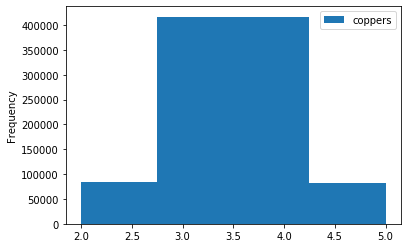

In [108]:
df.plot.hist(bins = 4)#



In [109]:
## == TEST CASES for Puzzle 3 ==
# - This read-only cell contains test cases for your previous cell(s).
# - If this cell runs without any errors in the output, you PASSED all test cases!
# - If this cell results errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
assert( len(df) >= 1000 ), "Your simulation must have at least 1,000 observations."
assert( 'coppers' in df ), "Your simulation must have a column called `coppers`."
assert( 3 < df['coppers'].mean() < 4 ), "Your simulation should have a mean value around 3.5 -- you may want to check if your Puzzle 2 function is correct?"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")
print()
print(f"- You have a simulation that runs {len(df)} starting hands of Dominion!")
print(f"- Simulated expected value of Coppers: {df['coppers'].mean()} coppers per starting hand")


🎉 All tests passed! 🎉

- You have a simulation that runs 1000000 starting hands of Dominion!
- Simulated expected value of Coppers: 3.49935 coppers per starting hand


## Puzzle 4: Your Random Variable

In your simulation, you created a random variable!  Let's call this random variable $C$:

<p><center>$C$ is the number of coppers drawn in your opening hand</center></p>

Using the histogram above, complete the following cells for the different probabilities of $C$ for various numbers of coppers.

In [110]:
# Probability of 2 coppers:
df2 = df[df['coppers'] == 2]
C_2coppers = len(df2) / len(df)
C_2coppers



0.083567

In [111]:
# Probability of 3 coppers:
df3 = df[df['coppers'] == 3]
C_3coppers = len(df3) / len(df)
C_3coppers



0.416528

In [112]:
# Probability of 4 coppers:
df4 = df[df['coppers'] == 4]
C_4coppers = len(df4) / len(df)
C_4coppers



0.416893

In [113]:
# Probability of 5 coppers:
df5 = df[df['coppers'] == 5]
C_5coppers = len(df5) / len(df)
C_5coppers



0.083012

#### Sanity Check

Remember, all probabilities must add up to 1!  Let's see if yours do:

In [114]:
C_all = C_2coppers + C_3coppers + C_4coppers + C_5coppers
C_all

0.9999999999999999

Let's also check that your simulation matches (or nearly matches) your calculated probability:

In [115]:
# The result of this cell should be 0 or *VERY CLOSE* to 0:
P_5coppers - C_5coppers

0.0003213333333333124

In [116]:
## == TEST CASES for Puzzle 4 ==
# - This read-only cell contains test cases for your previous cell(s).
# - If this cell runs without any errors in the output, you PASSED all test cases!
# - If this cell results errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
assert( abs(C_2coppers + C_3coppers + C_4coppers + C_5coppers - 1.0) < 0.001 ), "Your probabilities must add up to 1.0!"
assert( abs(P_5coppers - C_5coppers) < 0.05), "The probability from your simulation must closely match the expected result (from Puzzle #1)"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")


🎉 All tests passed! 🎉


## Puzzle 5: Statistics on C

Based on what you developed for $C$, find the mean for $C$.  In other words, find the expected value. The formula is on your note sheet from Wednesday :)

In [117]:
# Mean for C:


C_mean = 2*C_2coppers + 3*C_3coppers + 4*C_4coppers + 5*C_5coppers
C_mean



3.49935

In [118]:
## == TEST CASES for Puzzle 5 ==
# - This read-only cell contains test cases for your previous cell(s).
# - If this cell runs without any errors in the output, you PASSED all test cases!
# - If this cell results errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
assert( abs(C_mean-3.5) < 0.001 ), "Double check your formula for C_mean!"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Submit Your Work :)

Make sure to **Save and Checkpoint** your notebook, exit Jupyter, and submit your work! :)